# Welcome
I will be going through [this dataset](https://www.kaggle.com/unsdsn/world-happiness) found on kaggle, that will be modified for only the years 2015 to 2017.

I will be cleaning the data, I will go into detail on correlation and the R and R^2 values, aswell as looking at the regression plots for all the columns.

# Context
This dataset is obtained from Kaggle. I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:
*  economic production
*  social support 
*  life expectancy
*  freedom
*  absence of corruption
*  generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country". Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score.

*  Low dystopia residual = low level of happiness
*  high dystopia residual = high level of happiness

# Understanding the column data
*  Country
*  Happiness rank
*  Happiness score

This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10.

*  Economic (GDP per cap)
   * Extend of GDP that contributes to the happiness score
*  Family
   * To what extend does family contribute to the happiness score
*  Health
   * Extend of health (life expectancy) contribute to the happiness score
*  Freedom
   * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
*  Trust (Government corruption)
   * Extend of trust with regards to government corruption that contribute to happiness score
*  Generosity
   * Extend of generosity that contribute to happiness score
*  dystopia residual
*  Year

## Do note:
# *HappinessScore = Economic(GDPpercap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual*

# **Lets get started!**

In [0]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [0]:
# Importing dataset into colab
from google.colab import files 
uploaded = files.upload() #import 2015, 2016, 2017 files

Saving World_Happiness_2017.csv to World_Happiness_2017.csv


In [0]:
#reading in all three files
raw_2015= pd.read_csv('World_Happiness_2015.csv')
raw_2016= pd.read_csv('World_Happiness_2016.csv')
raw_2017= pd.read_csv('World_Happiness_2017.csv')

#lets check each head
raw_2015.head(2) #2015 head

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [0]:
raw_2016.head(2) #2016 head

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [0]:
raw_2017.head(2) #2017 head

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


# Things we need to fix with the data
* 2017 has different header names.
* 2015 and 2016 have a region attached, giving it one extra column.

There will be other things to check, but I want to fix these first.


## Fixing 2015 and 2016 columns

In [0]:
raw_2015.columns.unique()
correct_columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
raw_2015 = raw_2015[correct_columns]
raw_2016 = raw_2016[correct_columns]
if raw_2015.columns.unique().all() == raw_2016.columns.unique().all():
  print("unique columns are the same")

unique columns are the same


## Fixing 2017 data

The trust and generosity columns were swapped in our data, so we can go ahead and swap them back to match our 2015 and 2016 set.

In [0]:
#we need to change the the 2017 data to also look like the 2015 and 2016
#raw_2017.columns.unique()
temp_col = ['Country', 'Happiness.Rank', 'Happiness.Score','Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
raw_2017 = raw_2017[temp_col] #deleting two useless columns for us

raw_2017.columns = raw_2015.columns
raw_2017.columns.unique()
if raw_2015.columns.unique().all() == raw_2017.columns.unique().all():
  print("unique columns are the same")

unique columns are the same


Awesome, now all of our years match, lets load this all into one dataset now, first we should add a year column, so we can use this later on.

## Adding Year columns to data

In [0]:
raw_2015['Year']=2015
raw_2016['Year']=2016
raw_2017['Year']=2017

## Joining data into one dataset

In [0]:
join = [raw_2015, raw_2016, raw_2017]
data = pd.concat(join)
# Looking at total samples
data.count() #everything looks right

Country                          470
Happiness Rank                   470
Happiness Score                  470
Economy (GDP per Capita)         470
Family                           470
Health (Life Expectancy)         470
Freedom                          470
Trust (Government Corruption)    470
Generosity                       470
Dystopia Residual                470
Year                             470
dtype: int64

In [0]:
# Checking how many rows and columns we have
data.shape

(470, 11)

In [0]:
# Checking the data types of our data
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [0]:
# Checking data for null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [0]:
factors = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
data_w_cols = data[factors]
data_w_cols[data_w_cols <= 0].count()
#data_w_cols[data_w_cols < 0].count() #unhide to check if and are below 0


Happiness Score                  0
Economy (GDP per Capita)         3
Family                           3
Health (Life Expectancy)         3
Freedom                          3
Trust (Government Corruption)    3
Generosity                       3
Dystopia Residual                0
dtype: int64

If you unhide the second count, we can see that all these values are strictly 0

We have 3 values in each that are set to 0, out of 470 samples, this wont throw off our values too much, although let me make sure they are not all the same row.

In [0]:
data_w_cols[data_w_cols <= 0].count().count()

8

out of 18 values that are set to 0, it comes from only 8 rows. This means they are spread out enough not to mess with our data too much. As we are unsure if these values were too low to count, or not entered correctly. Alternatively, we could also replace these with the value of our mean for the column.

In [0]:
type(data)

pandas.core.frame.DataFrame

# Lets take a look at some scatter plots

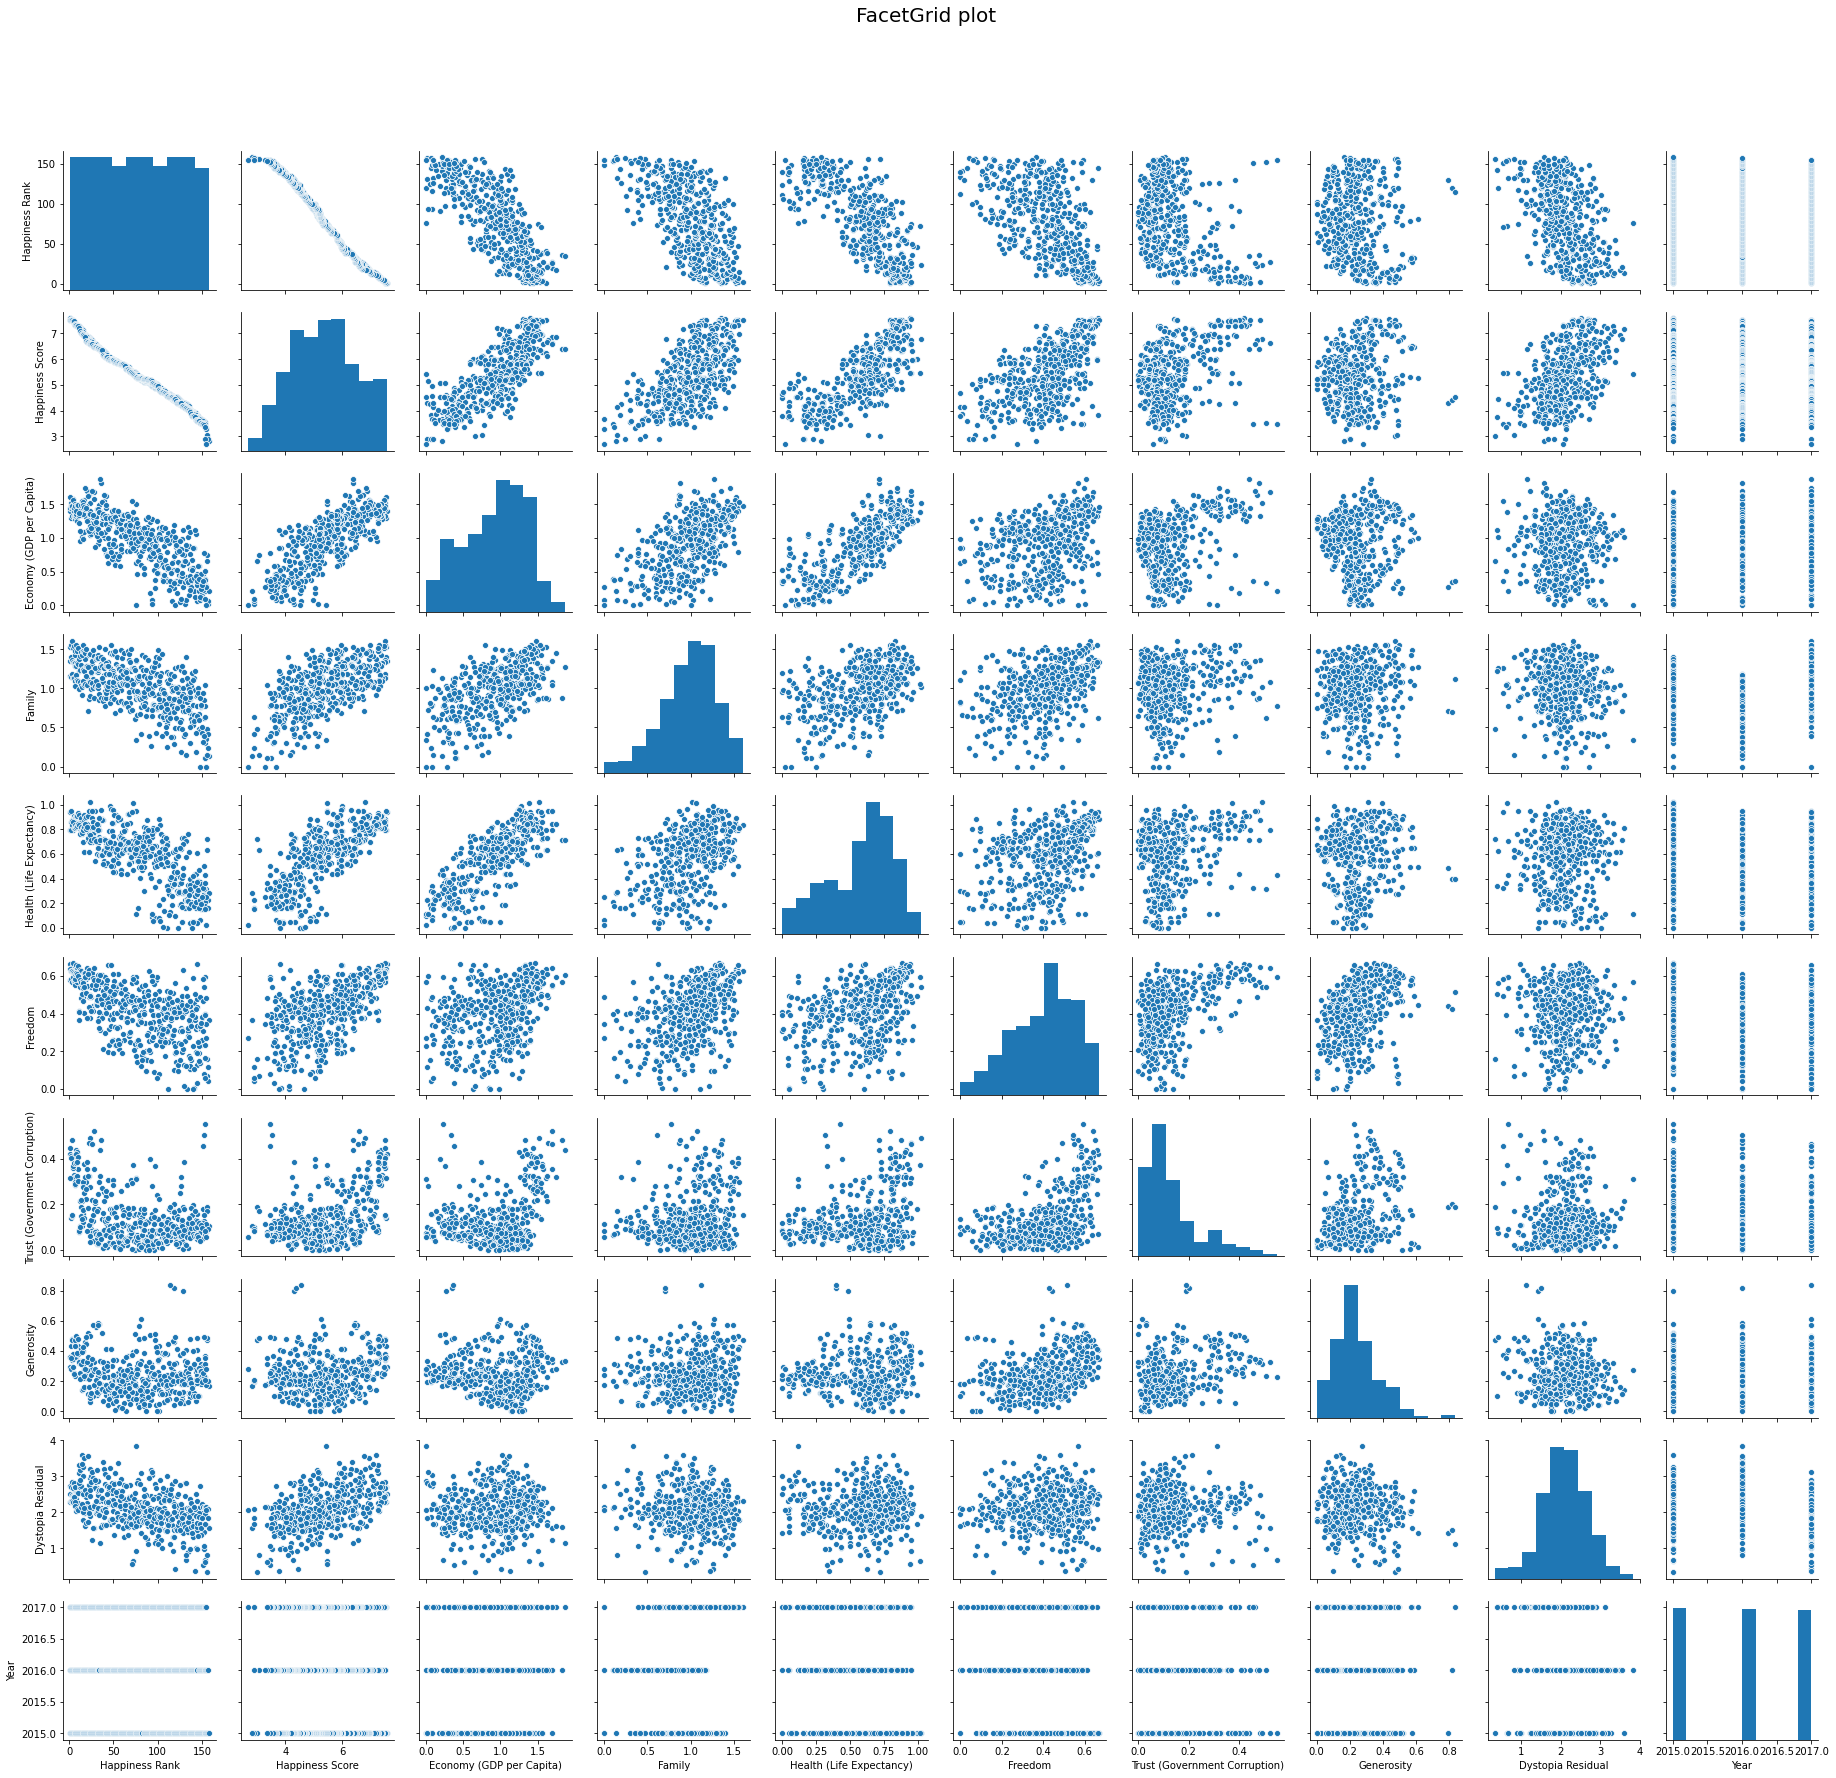

In [0]:
#pulling up a quick graph of plots for our data
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

# Taking a look at Pearsons R value

Next lets look at the correlation coefficient for our 7 factors.

Taking a look a these charts below, remember they are all "Happiness Score" vs the row name. This is why we get a r score of 1.0 when Happiness score is compared with itself.

In [0]:
#excluding 3 factors here, Country, Happiness Rank, and Year
factors = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
corr_data = data[factors]

#applying pearsons correlation algorith
corr_data_all = corr_data.corr()

#grabbing the single row for Happiness Score vs (Row)
corr_data = corr_data_all['Happiness Score']
corr_data

Happiness Score                  1.000000
Economy (GDP per Capita)         0.785450
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Trust (Government Corruption)    0.406340
Generosity                       0.163562
Dystopia Residual                0.489747
Name: Happiness Score, dtype: float64

Now we can see all the correlation coefficients for the rows vs Happiness Score.

Lets take a look at these values squared

## Pearsons R^2

In [0]:
#squaring our correlation coefficient
corr_data_sq = corr_data **2
corr_data_sq

Happiness Score                  1.000000
Economy (GDP per Capita)         0.616931
Family                           0.405173
Health (Life Expectancy)         0.559564
Freedom                          0.313996
Trust (Government Corruption)    0.165112
Generosity                       0.026752
Dystopia Residual                0.239852
Name: Happiness Score, dtype: float64

Now here is our Pearson Correlation coefficient Squared for all of our factors

## Heatmap of our R^2 values

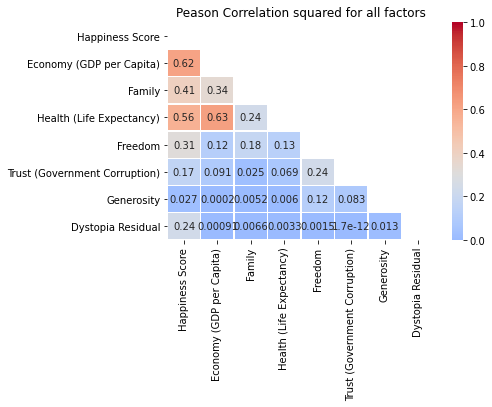

In [0]:
#putting whole data of the correlation coefficient squared into a heatmap
hm_data = data[factors].corr() **2
mask = np.triu(hm_data)
hm = sns.heatmap(hm_data, annot=True, cmap = 'coolwarm', vmin =0, vmax =1, mask = mask, center = .3, linewidths=.5)
plt.title('Peason Correlation squared for all factors')
plt.show()

What we can gather from this:

When comparing a rows correlation with our Happiness Score, we can gather what the relation between its Happiness Score and the row are, or how well fit our line will be. A score close to 1 tells us the linear regression line is a better fit, while a score closer to 0, means its a worse fit.

It also seems like our Economy vs Family score fits the regression model moderately well at 0.34, as well as Economy vs Health at 0.63!

First lets make this easier to see as percents.

## R^2 as percents

In [0]:
#convert our previous slice of the coefficients to percents
corr_percent = corr_data_sq * 100
corr_percent

Happiness Score                  100.000000
Economy (GDP per Capita)          61.693114
Family                            40.517294
Health (Life Expectancy)          55.956440
Freedom                           31.399592
Trust (Government Corruption)     16.511192
Generosity                         2.675240
Dystopia Residual                 23.985230
Name: Happiness Score, dtype: float64

So now we can see that 61.7% of the Happiness Score seems to be effected by the Economy, where as only 4.5% of our Happiness Score is effected by the Generosity.

In short, Generosity and Trust seem to have little to do with the Happiness Scores reported. While the three biggest facors seem to be peoples' Economy, Family, and Health.

# Building scatterplots

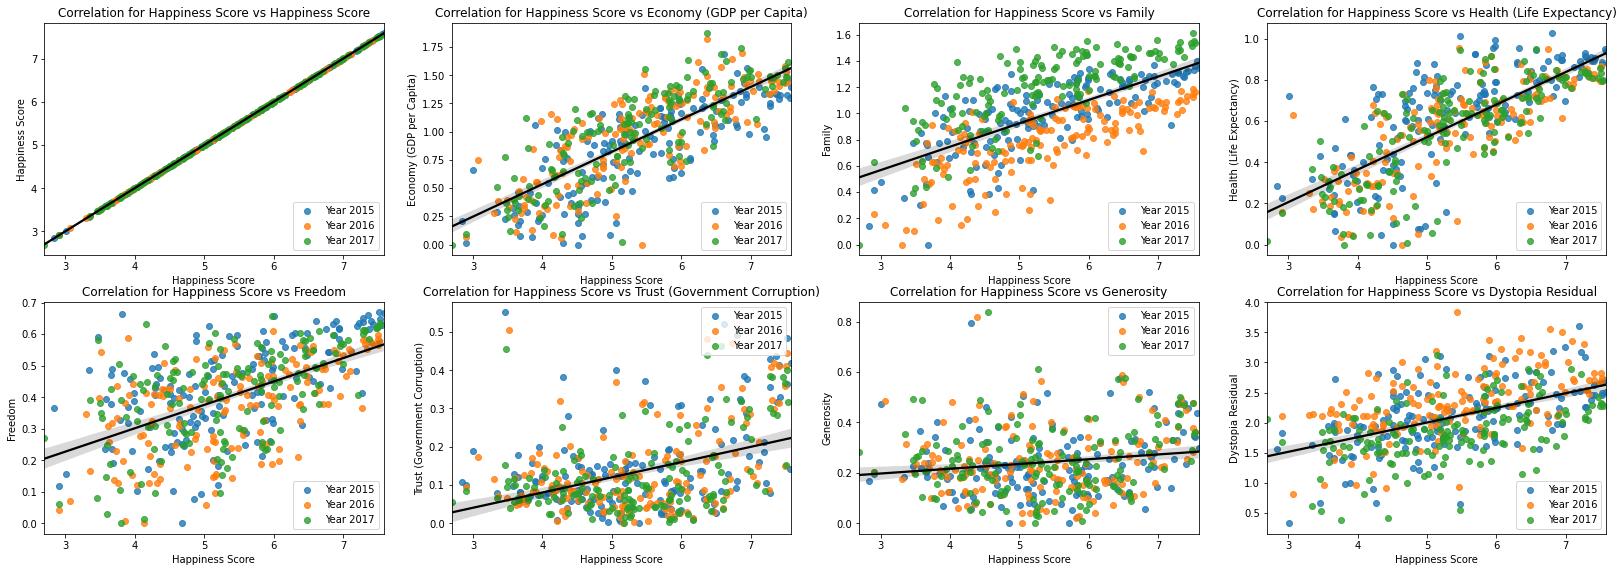

In [0]:
# creating subsets of T/F tables for all our rows
yr_2015 = data['Year'] == 2015
yr_2016 = data['Year'] == 2016
yr_2017 = data['Year'] == 2017

# renaming those subsets into new data variables
data_15 = data[yr_2015]
data_16 = data[yr_2016]
data_17 = data[yr_2017]

# setting up for the loop
y_15 = "Year 2015"
y_16 = "Year 2016"
y_17 = "Year 2017"
y_a = [y_15, y_16, y_17]

#setting up how many plots we have
fig, ax = plt.subplots(2, len(factors)//2)
row = 2
col = ax.shape[1]

#setting sizes
fig.set_size_inches(7*col, 4.7*row)

#calling each year seperately, to get the regplot to layer in different colors
for i, factor in enumerate(corr_data.index): #grabbing column name and index to cycle through
  l = sns.regplot(data = data, x=data_15['Happiness Score'], y= data_15[factor], fit_reg=False, label = y_a[0], ax=ax[i//col][i%col]) #cycle through 2015 data
  sns.regplot(data = data, x=data_16['Happiness Score'], y= data_16[factor], fit_reg=False, label = y_a[1], ax=ax[i//col][i%col]) #layer ontop 2016 data
  sns.regplot(data = data, x=data_17['Happiness Score'], y= data_17[factor], fit_reg=False, label = y_a[2], ax=ax[i//col][i%col]) #layer ontop 2017 data
  #plot for regression line of total years
  sns.regplot(data = data, x=data['Happiness Score'], y= data[factor], scatter= False, color = 'black', ax=ax[i//col][i%col]).set_title("Correlation for Happiness Score vs {0}".format(factor))
  #print legend
  if (factor != "Trust (Government Corruption)" and factor != "Generosity"): 
    l.legend(loc=4)
  else:
    l.legend(loc=1)

As expected with our linear regression lines, there are good fits for the Economy, Family, and Health graphs, while theres a moderately good fit for the Dystopia and Freedom graphs, and a poor fit for the Generosity and Trust graphs.

With the color differences, we can see the Family scores tend to be lower in 2016 and the Dystopia Residual scores seem to be higher in 2016. While everything else tends to stay relatively the same throughout the 3 years.

# Splitting the 2016 data out of our scatter plot

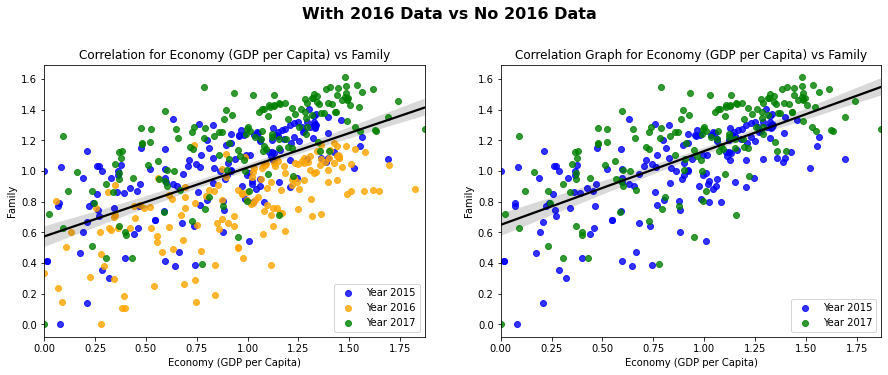

In [0]:
#setting up how many plots we have
fig, ax = plt.subplots(1,2)

#setting sizes
fig.set_size_inches(15, 5)
fig.text(x=.5, y=1, s="With 2016 Data vs No 2016 Data", fontsize=16, weight='bold', ha='center', va='bottom')

#grabbing a dataset of strictly year 2015 and year 2017
data_15_17 = data[yr_2015 | yr_2017]

#calling each year seperately, to get the regplot to layer in different colors
for i in range(2): #only two graphs
  l = sns.regplot(data = data, x=data_15['Economy (GDP per Capita)'], y= data_15["Family"], fit_reg=False, label = y_a[0], ax=ax[i], color = "blue") #cycle through 2015 data
  if i == 0:
    sns.regplot(data = data, x=data_16['Economy (GDP per Capita)'], y= data_16["Family"], fit_reg=False, label = y_a[1], ax=ax[i], color = "orange") #layer ontop 2016 data
    sns.regplot(data = data, x=data['Economy (GDP per Capita)'], y= data["Family"], scatter= False, color = 'black', ax=ax[i]).set_title("Correlation for Economy (GDP per Capita) vs Family") #plot for regression line of total years
  else:
    sns.regplot(data = data, x= data_15_17['Economy (GDP per Capita)'], y=data_15_17['Family'], scatter= False, color = 'black', ax=ax[i]).set_title("Correlation Graph for Economy (GDP per Capita) vs Family") #plot for regression line of total years
  sns.regplot(data = data, x=data_17['Economy (GDP per Capita)'], y= data_17["Family"], fit_reg=False, label = y_a[2], ax=ax[i], color = "green") #layer ontop 2017 data
  l.legend(loc=4) #print legend

Taking a look at the 2016 data included graph for the Economy scores vs Family scores, we can see that our regression line fits moderately well, which was shown by our previous heatmap. We can also notice again, that our family scores tend to be lower, which we determined from our previous graphs.

Looking at the graph without the 2016 data, we can see a marginally better fit. Lets get a better look at these fits by finding the r squared values.

## Evaluation of R^2 values for Family vs Row


In [0]:
#using data for strictly year 2015 and year 2017
data_15_17_corr = data_15_17[factors]

#getting the correlation coefficient, then squaring the numbers
data_15_17_corr = data_15_17_corr.corr() **2
data_15_17_corr['Family']

Happiness Score                  0.490263
Economy (GDP per Capita)         0.457056
Family                           1.000000
Health (Life Expectancy)         0.227546
Freedom                          0.148295
Trust (Government Corruption)    0.029863
Generosity                       0.005934
Dystopia Residual                0.000589
Name: Family, dtype: float64

This chart is using the data without 2016, read as Family vs Row, this is why we have 1.0 in Family vs Family.

As we can see our squared correlation coefficients between Family and Economy jumped from 0.34 to 0.46, showing over a 10% increase in our data fitting better, after removing our 2016 data.

We can also notice our Family score vs Happiness score jumped from 0.46 to 0.49, a small increase without our 2016 data.

There was one more correlation that seemed to fit very well, from the heatmap earlier, Economy vs Health.

# Checking Economy vs Health correlation

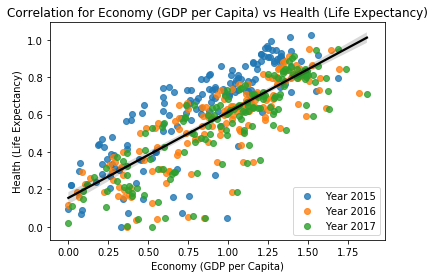

In [0]:
l = sns.regplot(data = data, x=data_15['Economy (GDP per Capita)'], y= data_15['Health (Life Expectancy)'], fit_reg=False, label = y_a[0]) #cycle through 2015 data
sns.regplot(data = data, x=data_16['Economy (GDP per Capita)'], y= data_16['Health (Life Expectancy)'], fit_reg=False, label = y_a[1]) #layer ontop 2016 data
sns.regplot(data = data, x=data_17['Economy (GDP per Capita)'], y= data_17['Health (Life Expectancy)'], fit_reg=False, label = y_a[2]) #layer ontop 2017 data
#plot for regression line of total years
sns.regplot(data = data, x=data['Economy (GDP per Capita)'], y= data['Health (Life Expectancy)'], scatter= False, color = 'black').set_title("Correlation for Economy (GDP per Capita) vs Health (Life Expectancy)")
l.legend(loc=4)

The is graph of Economy vs Health has a heavy correlation of ~63%, the highest correlation out of all our categories.

#Summary
In general we can hypothesize that the biggest factors for someones happiness may be their Economy(61%), Health(56%), and Family(40%). We can also assume that Freedom(31%) and the Dystopia Residual(24%) have moderate correlation, while Trust(17%) and Generosity(3%) typically have the lowest correlation.

We can also notice that, in general, people in 2016 had a lower score for Family, which showed, when removing the lower 2016 data, a 12% increase (34% to 46%) in a correlation between Family and Economy, and a 3% increase (46% to 49%) in Family vs Happiness. This is something that is expected, as Happiness is more heavily correlated with three factors: Economy(61%), Health(56%), and Family(40%). Meanwhile the Economy is only heavily correlated with two factors: Health(63%) and Family(34%). Meaning the family scores will have a heavier impact on the economy score, as opposed to the happiness score, even though its correlation percentage is lower. 